## GEMM Definition

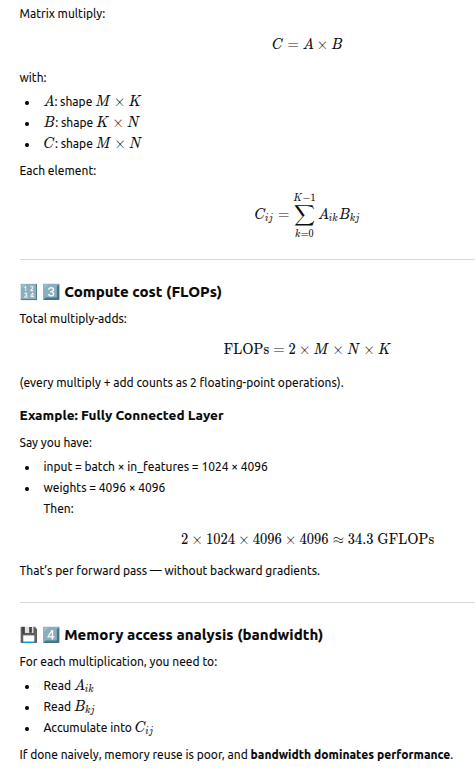

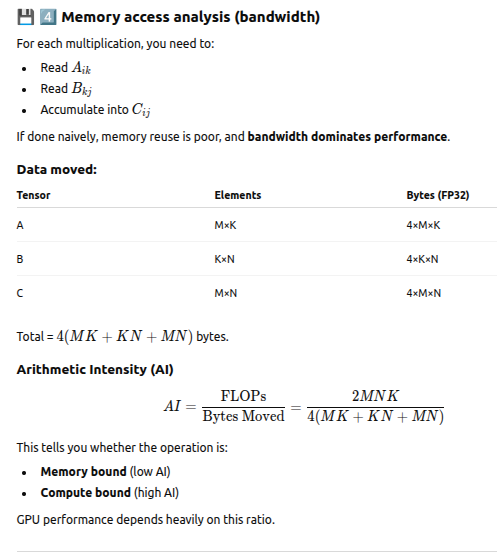

## im2col Operation

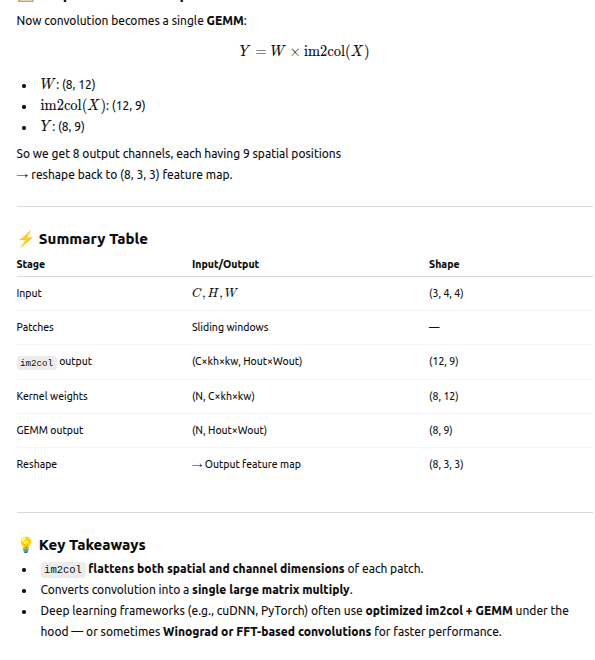

## Arithmatic Intensity (AI)

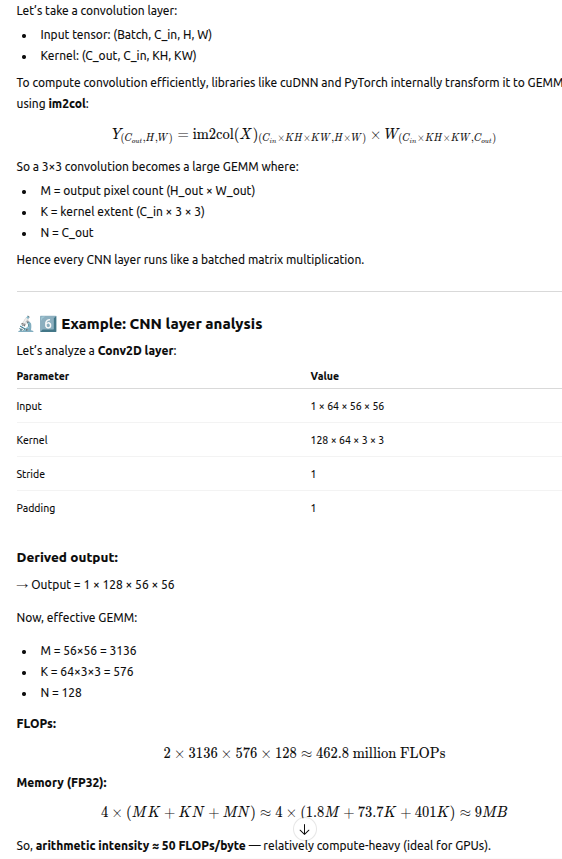

## GPU Excution Mapping for GEMM

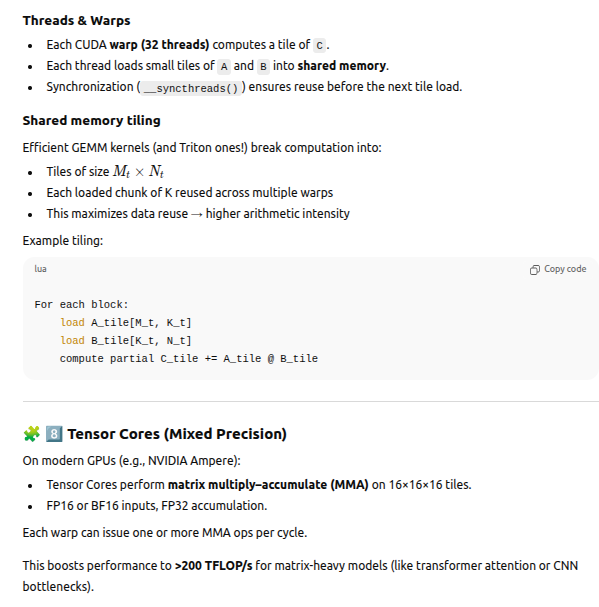

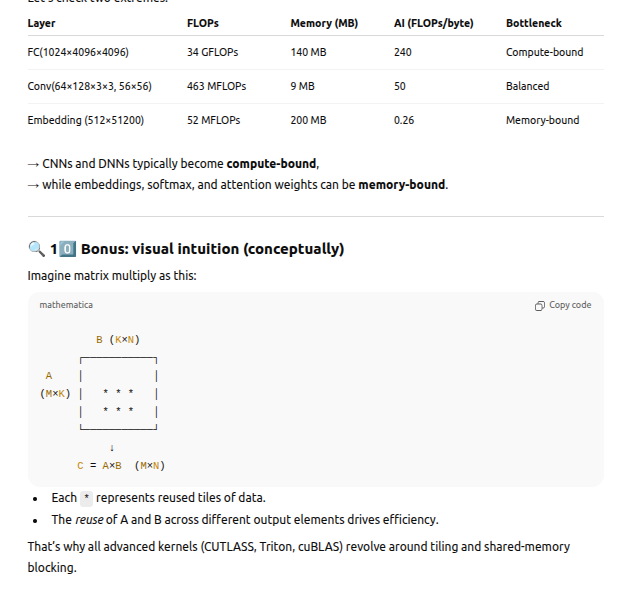

## Shmoo Benchmark

✅ Loaded 15 entries from shmoo_results.csv


,Variant,MatrixSize,Time_ms,GFLOPs,MaxAbsError
0,0,256,0.125376,267.630,0.000023
1,1,256,0.072544,462.539,76.460900
2,2,256,0.059680,562.239,76.460900
3,0,512,0.271584,988.407,0.000046
4,1,512,0.039104,6864.650,145.844000


/tmp/ipykernel_239895/2198126752.py:63: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/avaish/linux-games/py311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


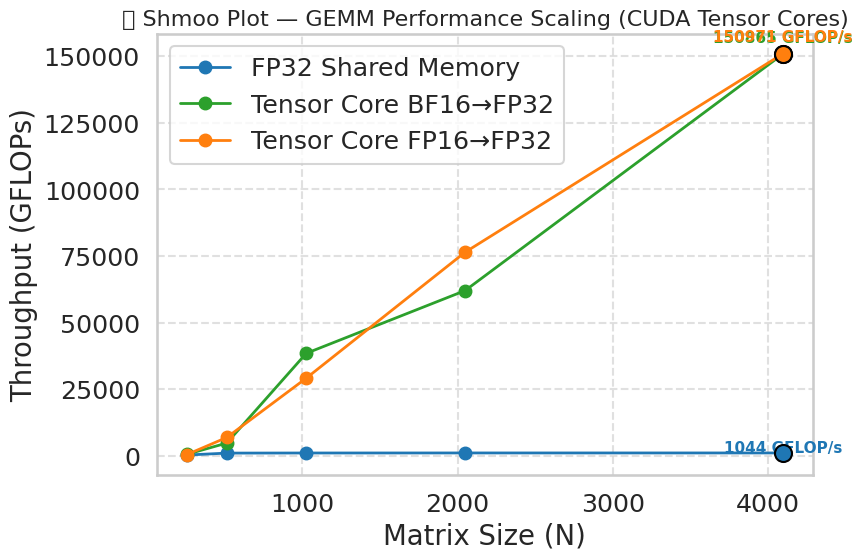

⚙️  Performance Summary:
  FP32 Shared Memory             :  1043.68 GFLOPs   ( 1.00× faster than FP32 Shared)
  Tensor Core BF16→FP32          : 150865.00 GFLOPs   (144.55× faster than FP32 Shared)
  Tensor Core FP16→FP32          : 150971.00 GFLOPs   (144.65× faster than FP32 Shared)


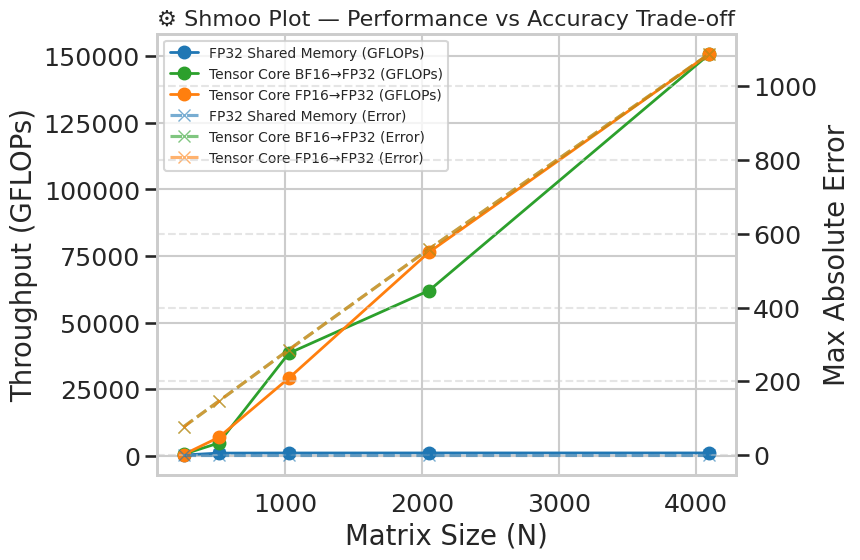


🏁 Best-performing variant: Tensor Core FP16→FP32
   Peak throughput: 150971.00 GFLOP/s


In [2]:
# 📊 Enhanced Shmoo Plot Visualization for matmul_variants_shmoo.cu
# Author: ChatGPT (OpenAI), 2025

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------------------------------------------
# 1️⃣ Load CSV results
# -------------------------------------------------------------------
df = pd.read_csv("shmoo_results.csv")
print(f"✅ Loaded {len(df)} entries from shmoo_results.csv")
display(df.head())

# -------------------------------------------------------------------
# 2️⃣ Clean and map variant names
# -------------------------------------------------------------------
variant_names = {
    0: "FP32 Shared Memory",
    1: "Tensor Core FP16→FP32",
    2: "Tensor Core BF16→FP32"
}
df["VariantName"] = df["Variant"].map(variant_names)

# -------------------------------------------------------------------
# 3️⃣ Style settings
# -------------------------------------------------------------------
sns.set(style="whitegrid", context="talk", font_scale=1.1)
colors = {
    "FP32 Shared Memory": "#1f77b4",  # blue
    "Tensor Core FP16→FP32": "#ff7f0e",  # orange
    "Tensor Core BF16→FP32": "#2ca02c",  # green
}

# -------------------------------------------------------------------
# 4️⃣ Plot 1: Shmoo Performance Curve
# -------------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.title("🔹 Shmoo Plot — GEMM Performance Scaling (CUDA Tensor Cores)", fontsize=16)

max_gflops = {}

for name, group in df.groupby("VariantName"):
    group = group.sort_values("MatrixSize")
    plt.plot(group["MatrixSize"], group["GFLOPs"],
             marker="o", linewidth=2, label=name, color=colors[name])
    
    # Highlight and annotate the maximum GFLOPs point
    max_idx = group["GFLOPs"].idxmax()
    max_point = group.loc[max_idx]
    plt.scatter(max_point["MatrixSize"], max_point["GFLOPs"], s=150,
                edgecolor="black", color=colors[name], zorder=5)
    plt.text(max_point["MatrixSize"], max_point["GFLOPs"] * 1.03,
             f"{max_point['GFLOPs']:.0f} GFLOP/s", fontsize=11,
             ha="center", color=colors[name], weight="bold")
    max_gflops[name] = max_point["GFLOPs"]

plt.xlabel("Matrix Size (N)")
plt.ylabel("Throughput (GFLOPs)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 5️⃣ Print performance summary
# -------------------------------------------------------------------
print("⚙️  Performance Summary:")
base = max_gflops["FP32 Shared Memory"]
for name, gflops in max_gflops.items():
    speedup = gflops / base
    print(f"  {name:30s} : {gflops:8.2f} GFLOPs   ({speedup:5.2f}× faster than FP32 Shared)")

# -------------------------------------------------------------------
# 6️⃣ Plot 2: Performance vs Accuracy (dual Y-axis)
# -------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(9,6))
plt.title("⚙️ Shmoo Plot — Performance vs Accuracy Trade-off", fontsize=16)

for name, group in df.groupby("VariantName"):
    group = group.sort_values("MatrixSize")
    ax1.plot(group["MatrixSize"], group["GFLOPs"],
             marker="o", linewidth=2, color=colors[name], label=f"{name} (GFLOPs)")

ax2 = ax1.twinx()
for name, group in df.groupby("VariantName"):
    group = group.sort_values("MatrixSize")
    ax2.plot(group["MatrixSize"], group["MaxAbsError"],
             marker="x", linestyle="--", color=colors[name], alpha=0.6,
             label=f"{name} (Error)")

ax1.set_xlabel("Matrix Size (N)")
ax1.set_ylabel("Throughput (GFLOPs)")
ax2.set_ylabel("Max Absolute Error")

# Merge both legends nicely
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left", fontsize=10)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# 7️⃣ Summary Text
# -------------------------------------------------------------------
best_variant = max(max_gflops, key=max_gflops.get)
print(f"\n🏁 Best-performing variant: {best_variant}")
print(f"   Peak throughput: {max_gflops[best_variant]:.2f} GFLOP/s")
